In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

# Initialize min-max scaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
minMaxScaler = preprocessing.MinMaxScaler()

# For VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
longTextDB = pd.read_csv(r"C:\Users\admin\Desktop\Datasets\articles1.csv", usecols=['author', 'content'])
longTextDB.head

<bound method NDFrame.head of                               author  \
0                         Carl Hulse   
1      Benjamin Mueller and Al Baker   
2                       Margalit Fox   
3                   William McDonald   
4                      Choe Sang-Hun   
...                              ...   
49995                 Robinson Meyer   
49996                     Amy Zegart   
49997                  Jeremy Venook   
49998                    Emily DeRuy   
49999                   Marina Koren   

                                                 content  
0      WASHINGTON  —   Congressional Republicans have...  
1      After the bullet shells get counted, the blood...  
2      When Walt Disney’s “Bambi” opened in 1942, cri...  
3      Death may be the great equalizer, but it isn’t...  
4      SEOUL, South Korea  —   North Korea’s leader, ...  
...                                                  ...  
49995  As chairman and CEO of ExxonMobil, Rex Tillers...  
49996  I’ve spent

author  content
False   False      43694
True    False       6306
dtype: int64

In [4]:
longTextDB=longTextDB[longTextDB['author'].notna()]

### TOP 20 AUTHORS

In [5]:
finalDF = longTextDB.groupby(['author'], sort=False)['content'].count().nlargest(n=20)
finalDF

author
Breitbart News         1559
Pam Key                1282
Charlie Spiering        928
Jerome Hudson           806
John Hayward            747
Daniel Nussbaum         735
AWR Hawkins             720
Ian Hanchett            647
Joel B. Pollak          624
Alex Swoyer             604
Warner Todd Huston      545
Jeff Poor               505
Trent Baker             457
Breitbart London        447
Katherine Rodriguez     435
Charlie Nash            421
Ben Kew                 373
Frances Martel          366
Bob Price               340
Dr. Susan Berry         333
Name: content, dtype: int64

In [6]:
finalDF.index


Index(['Breitbart News', 'Pam Key', 'Charlie Spiering', 'Jerome Hudson',
       'John Hayward', 'Daniel Nussbaum', 'AWR Hawkins', 'Ian Hanchett',
       'Joel B. Pollak', 'Alex Swoyer', 'Warner Todd Huston', 'Jeff Poor',
       'Trent Baker', 'Breitbart London', 'Katherine Rodriguez',
       'Charlie Nash', 'Ben Kew', 'Frances Martel', 'Bob Price',
       'Dr. Susan Berry'],
      dtype='object', name='author')

In [5]:
# Keep the rows in the DF pertaining to the names in finalDF.index

# df.loc[df['column_name'].isin(some_values)]

mergedST_20 = mergedST.loc[mergedST['name'].isin(finalDF.index)]
mergedST_20.head(10)

NameError: name 'mergedST' is not defined

In [32]:
top20 = longTextDB['author'].value_counts().nlargest(20)
top20

Breitbart News         1559
Pam Key                1282
Charlie Spiering        928
Jerome Hudson           806
John Hayward            747
Daniel Nussbaum         735
AWR Hawkins             720
Ian Hanchett            647
Joel B. Pollak          624
Alex Swoyer             604
Warner Todd Huston      545
Jeff Poor               505
Trent Baker             457
Breitbart London        447
Katherine Rodriguez     435
Charlie Nash            421
Ben Kew                 373
Frances Martel          366
Bob Price               340
Dr. Susan Berry         333
Name: author, dtype: int64

Text(0, 0.5, 'content count')

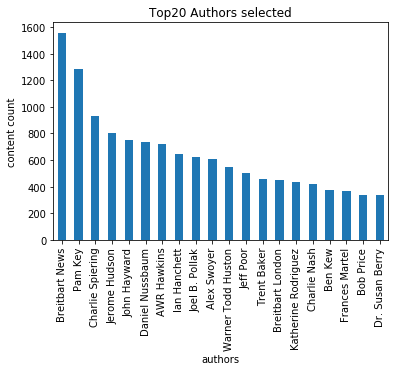

In [38]:

barChart = top20.plot.bar(title="Top20 Authors selected")
barChart.set_xlabel("authors")
barChart.set_ylabel("content count")

In [36]:
forReport = pd.read_csv(r"C:\Users\admin\Desktop\Datasets\articles1.csv")

In [37]:
forReport.head(5)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [40]:
forReport.shape

(50000, 10)

In [41]:
forReport.describe()

,Unnamed: 0,id,year,month,url
count,50000.000000,50000.000000,50000.000000,50000.000000,0.0
mean,25694.378380,44432.454800,2016.273700,5.508940,NaN
std,15350.143677,15773.615179,0.634694,3.333062,NaN
min,0.000000,17283.000000,2011.000000,1.000000,NaN
25%,12500.750000,31236.750000,2016.000000,3.000000,NaN
50%,25004.500000,43757.500000,2016.000000,5.000000,NaN
75%,38630.250000,57479.250000,2017.000000,8.000000,NaN
max,53291.000000,73469.000000,2017.000000,12.000000,NaN


In [10]:
top5 = longTextDB['author'].value_counts().nlargest(5)

### Keras 

In [42]:
# Load Keras models and layers

from numpy import loadtxt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import tensorflow as tf

#### Test Train Split

In [43]:
# Slice the text length to 500

X = longTextDB.iloc[:,0:1]
y = longTextDB.iloc[:,1]

print(X.shape)
print(y.shape)

(43694, 1)
(43694,)


In [44]:
X.head

<bound method NDFrame.head of                               author
0                         Carl Hulse
1      Benjamin Mueller and Al Baker
2                       Margalit Fox
3                   William McDonald
4                      Choe Sang-Hun
...                              ...
49995                 Robinson Meyer
49996                     Amy Zegart
49997                  Jeremy Venook
49998                    Emily DeRuy
49999                   Marina Koren

[43694 rows x 1 columns]>

In [45]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(34955, 1)
(34955,)
(8739, 1)
(8739,)


In [47]:
X_train.author.values

array(['Jordan Schachtel', 'Ian Hanchett', 'John Blake', ...,
       'Reed Abelson', 'Joel B. Pollak', 'James Griffiths'], dtype=object)

In [48]:
# Tokenization of words

from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence

vocSizeList = []
hashList=[]

for line in X_train.author: 
    seq_words = set(text_to_word_sequence(line))   
    vocab_size = len(seq_words)
    vocSizeList.append(vocab_size) 
    result = hashing_trick(line, round(vocab_size*2), hash_function='md5')
    hashList.append(result)

test_string_new = hashList
test_string_new

for elem in test_string_new:
    #print(elem)
    elem = str(elem)
    #print(type(elem))

X_train_new = pd.DataFrame([hashList])
X_train_new

print("**************", X_train_new.shape)

************** (1, 34955)


####  Steps to tokenize the text
#### 1) For each author in top20, top10 and top5, create a list of words called document ==> docs20, docs10, docs5
#### 2) For each of these, do a fit_on_texts with the tokenizer initialized.
#### 3) Keras provides 4 attributes :  (i) word_counts (ii) word_docs (iii) word_index (iv) document_count

In [49]:
from keras.preprocessing.text import Tokenizer
t = Tokenizer()

In [50]:
from keras.preprocessing.text import text_to_word_sequence

In [51]:
# Repeat the same for y_test

vocSizeListTest = []
hashListTest=[]

for line in X_test.author: 
    #print(line)
    seq_words_test = set(text_to_word_sequence(line))   
    vocab_size_test = len(seq_words_test)
    vocSizeListTest.append(vocab_size_test)
 
    result_X_test = hashing_trick(line, round(vocab_size*2), hash_function='md5')
    hashListTest.append(result_X_test)

#hashListTest

test_string_new = hashListTest
test_string_new

for elem in test_string_new:
    #print(elem)
    elem = str(elem)
    #print(type(elem))

X_test_new = pd.DataFrame([hashListTest])
X_test_new

print("**************", X_test_new.shape)

************** (1, 8739)


In [52]:
X_train_trans = X_train_new.transpose()
X_test_trans = X_test_new.transpose()


X_train_new = X_train_trans
X_test_new = X_test_trans

# print(X_train_new)
# print(X_test_new)

In [53]:
# Repeat the same for X_test and X_train

vocSizeListy_train = []
hashListy_train=[]

for line in y_train: 
    #print(line)
    seq_words_ytrain = set(text_to_word_sequence(line))   
    vocab_size_ytrain = len(seq_words_ytrain)
    vocSizeListy_train.append(vocab_size_ytrain)
 
    result_y_train = hashing_trick(line, round(vocab_size*2), hash_function='md5')
    hashListy_train.append(result_y_train)

#hashListX_train

# ************************************************************
# ************************************************************

test_string_new = hashListy_train
test_string_new

for elem in test_string_new:
    #print(elem)
    elem = str(elem)
    #print(type(elem))

y_train_new = pd.DataFrame([hashListy_train])
y_train_new

print("**************", y_train_new.shape)

************** (1, 34955)


In [54]:
vocSizeListy_test = []
hashListy_test=[]

for line in y_test: 
    #print(line)
    seq_words_ytest = set(text_to_word_sequence(line))   
    vocab_size_ytest = len(seq_words_ytest)
    vocSizeListy_test.append(vocab_size_ytest)
 
    result_y_test = hashing_trick(line, round(vocab_size*2), hash_function='md5')
    hashListy_test.append(result_y_test)

hashListy_test

# ************************************************************
# ************************************************************

test_string_new = hashListy_test
test_string_new

for elem in test_string_new:
    #print(elem)
    elem = str(elem)
    #print(type(elem))

y_test_new = pd.DataFrame([hashListy_test])
y_test_new.shape

(1, 8739)

In [55]:
y_train_trans=y_train_new.transpose()

y_test_trans=y_test_new.transpose()

y_train_new = y_train_trans
y_test_new = y_test_trans
 

In [56]:
y_train_new

,0
0,"[1, 2, 2, 3, 1, 1, 1, 1, 2, 1, 3, 2, 2, 1, 2, ..."
1,"[3, 2, 1, 1, 2, 3, 1, 3, 2, 2, 2, 2, 3, 1, 3, ..."
2,"[2, 2, 2, 2, 3, 3, 3, 2, 1, 2, 2, 1, 2, 3, 1, ..."
3,"[1, 3, 2, 3, 2, 1, 3, 3, 3, 2, 1, 1, 2, 1, 2, ..."
4,"[3, 3, 1, 2, 3, 1, 1, 3, 2, 3, 2, 2, 2, 3, 3, ..."
...,...
34950,"[2, 2, 1, 1, 3, 3, 2, 3, 1, 2, 1, 3, 1, 2, 3, ..."
34951,"[2, 2, 1, 3, 3, 2, 1, 2, 2, 3, 3, 1, 3, 2, 1, ..."
34952,"[3, 3, 3, 3, 3, 3, 1, 2, 2, 1, 2, 2, 1, 1, 3, ..."
34953,"[3, 3, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 3, 2, ..."


In [57]:
y_test_new

,0
0,"[2, 2, 2, 1, 1, 3, 3, 2, 3, 3, 3, 2, 2, 1, 2, ..."
1,"[2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, ..."
2,"[2, 3, 2, 1, 1, 2, 3, 1, 3, 2, 1, 2, 2, 2, 1, ..."
3,"[2, 2, 1, 1, 2, 3, 2, 1, 1, 2, 2, 2, 2, 2, 1, ..."
4,"[1, 1, 3, 3, 3, 1, 2, 3, 1, 1, 1, 2, 2, 1, 3, ..."
...,...
8734,"[2, 2, 1, 2, 2, 1, 2, 3, 3, 2, 3, 3, 2, 1, 2, ..."
8735,"[3, 3, 2, 1, 3, 2, 2, 1, 1, 2, 3, 2, 2, 2, 3, ..."
8736,"[2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 1, 2, 2, 3, 3, ..."
8737,"[2, 3, 3, 3, 1, 2, 2, 2, 3, 1, 3, 2, 3, 3, 1, ..."


In [58]:
X_test_new[0][0][0]

2

In [59]:
blank1=[]

for i in range(0,len(X_train_new)):
    for j in range(0, len(X_train_new[0][i])):
        x_train_arr = X_train_new[0][i][j]
        blank1.append(x_train_arr)

#print(blank1)

xTrain_arr = np.asarray(blank1)
# print("************", xTrain_arr.dtype)

# # # # *****************************

blank2=[]

for j in range(0,len(y_train_new)):
    for k in range(0, len(y_train_new[0][j])):
        y_train_arr = y_train_new[0][j][k]
        blank2.append(y_train_arr)

yTrain_arr = np.asarray(blank2)
# print("************", yTrain_arr.dtype)

# *****************************
        
blank3=[]

for i in range(0,len(X_test_new)):
    for j in range(0, len(X_train_new[0][i])):
        x_test_arr = X_test_new[0][i][0]
        blank3.append(x_test_arr)

x_test_arr = np.asarray(blank3)
print("************", x_test_arr.dtype)

# # # *****************************

blank4=[]

for j in range(0,len(y_test_new)):
    for k in range(0, len(y_test_new[0][j])):
        y_test_arr = y_test_new[0][j][k]
        blank4.append(y_test_arr)
        
y_test_arr = np.asarray(blank4) 
print("************", y_test_arr.dtype)

# # # ************************

************ int32
************ int32


In [60]:
#yTrain_arr = np.array(blank2)
xTrain_arr

array([1, 2, 3, ..., 2, 2, 2])

In [61]:
# Check the shape of all test and train dfs

print(xTrain_arr.shape)
print(yTrain_arr.shape)
print(x_test_arr.shape)
print(y_test_arr.shape)

(80535,)
(22738636,)
(20049,)
(5709946,)


In [62]:
"""
x sizes: 2649
y sizes: 213945
"""
y_train_arr_trunc = yTrain_arr[:80535]
y_test_arr_trunc = y_test_arr[:20049]
#x_test_arr_trunc = x_test_arr[:8739]

In [63]:
print(y_test_arr_trunc.shape)

(20049,)


In [64]:
# Define the model

model = Sequential()
from keras.layers import Input

model.add(Dense(units=4, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.summary()

[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
(None, 1) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
dense (None, 1) float32
dense_1 (None, 4) float32
dense_2 (None, 8) float32


[None, None, None]

In [65]:
#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [66]:
# Output layer: SELU activation function

#tf.config.run_functions_eagerly(True)
model.fit(xTrain_arr, y_train_arr_trunc, validation_data=(x_test_arr, y_test_arr_trunc),batch_size=10,epochs=5)

Epoch 1/5
8054/8054 [==============================] - 428s 3ms/step - loss: -14402.6582 - binary_accuracy: 0.2698 - val_loss: -40190.6094 - val_binary_accuracy: 0.2671
Epoch 2/5
8054/8054 [==============================] - 19s 2ms/step - loss: -143789.3906 - binary_accuracy: 0.2698 - val_loss: -224150.5312 - val_binary_accuracy: 0.2671
Epoch 3/5
8054/8054 [==============================] - 18s 2ms/step - loss: -502699.0625 - binary_accuracy: 0.2698 - val_loss: -636016.6875 - val_binary_accuracy: 0.2671
Epoch 4/5
8054/8054 [==============================] - 22s 3ms/step - loss: -1191057.2500 - binary_accuracy: 0.2698 - val_loss: -1355029.1250 - val_binary_accuracy: 0.2671
Epoch 5/5
8054/8054 [==============================] - 24s 3ms/step - loss: -2305888.7500 - binary_accuracy: 0.2698 - val_loss: -2461075.7500 - val_binary_accuracy: 0.2671


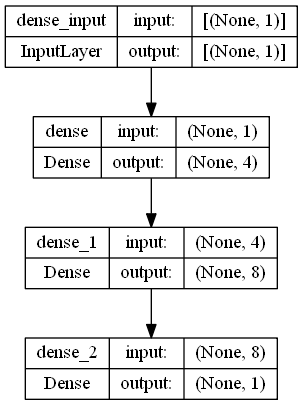

In [68]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [182]:
# Evaluate the model

_, accuracy = model.evaluate(xTrain_arr, y_train_arr_trunc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 26.98


### Run 2 : categorical accuracy, epochs = 5, batch_size=100

In [184]:
# ReLu, Softmax

In [185]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [186]:
tf.config.run_functions_eagerly(True)
model.fit(xTrain_arr, y_train_arr_trunc, validation_data=(x_test_arr, y_test_arr_trunc),batch_size=100,epochs=5)

Epoch 1/5
806/806 [==============================] - 33s 41ms/step - loss: -695080.0625 - categorical_accuracy: 1.0000 - val_loss: -580326.0000 - val_categorical_accuracy: 1.0000
Epoch 2/5
806/806 [==============================] - 28s 35ms/step - loss: -733719.1250 - categorical_accuracy: 1.0000 - val_loss: -612491.8750 - val_categorical_accuracy: 1.0000
Epoch 3/5
806/806 [==============================] - 29s 36ms/step - loss: -774256.0000 - categorical_accuracy: 1.0000 - val_loss: -646116.3750 - val_categorical_accuracy: 1.0000
Epoch 4/5
806/806 [==============================] - 28s 35ms/step - loss: -816521.0000 - categorical_accuracy: 1.0000 - val_loss: -681120.5625 - val_categorical_accuracy: 1.0000
Epoch 5/5
806/806 [==============================] - 26s 32ms/step - loss: -860533.8125 - categorical_accuracy: 1.0000 - val_loss: -717533.2500 - val_categorical_accuracy: 1.0000


### Run 3 : binary accuracy, epochs = 10, batch_size=100

In [187]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [188]:
tf.config.run_functions_eagerly(True)
model.fit(xTrain_arr, y_train_arr_trunc, validation_data=(x_test_arr, y_test_arr_trunc),batch_size=100,epochs=10)

Epoch 1/10
806/806 [==============================] - 31s 38ms/step - loss: -905301.8125 - binary_accuracy: 0.2698 - val_loss: -753944.0625 - val_binary_accuracy: 0.2671
Epoch 2/10
806/806 [==============================] - 28s 34ms/step - loss: -951295.0000 - binary_accuracy: 0.2698 - val_loss: -792085.2500 - val_binary_accuracy: 0.2671
Epoch 3/10
806/806 [==============================] - 28s 35ms/step - loss: -999298.0625 - binary_accuracy: 0.2698 - val_loss: -831834.3750 - val_binary_accuracy: 0.2671
Epoch 4/10
806/806 [==============================] - 28s 35ms/step - loss: -1049198.7500 - binary_accuracy: 0.2698 - val_loss: -873097.8750 - val_binary_accuracy: 0.2671
Epoch 5/10
806/806 [==============================] - 28s 35ms/step - loss: -1100903.7500 - binary_accuracy: 0.2698 - val_loss: -915772.1250 - val_binary_accuracy: 0.2671
Epoch 6/10
806/806 [==============================] - 27s 33ms/step - loss: -1154445.6250 - binary_accuracy: 0.2698 - val_loss: -959949.2500 - val_b

### Run 4 : tanh activation function, epochs=10, batch=50

In [191]:
model = Sequential()
from keras.layers import Input

model.add(Dense(units=4, input_dim=1, activation='relu'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='tanh'))

In [192]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [193]:
tf.config.run_functions_eagerly(True)
model.fit(xTrain_arr, y_train_arr_trunc, validation_data=(x_test_arr, y_test_arr_trunc),batch_size=50,epochs=10)

Epoch 1/10
1611/1611 [==============================] - 36s 22ms/step - loss: -11.2214 - binary_accuracy: 0.2593 - val_loss: -16.4758 - val_binary_accuracy: 0.2671
Epoch 2/10
1611/1611 [==============================] - 37s 23ms/step - loss: -16.5851 - binary_accuracy: 0.2698 - val_loss: -16.4758 - val_binary_accuracy: 0.2671
Epoch 3/10
1611/1611 [==============================] - 35s 22ms/step - loss: -16.5851 - binary_accuracy: 0.2698 - val_loss: -16.4758 - val_binary_accuracy: 0.2671
Epoch 4/10
1611/1611 [==============================] - 35s 21ms/step - loss: -16.5851 - binary_accuracy: 0.2698 - val_loss: -16.4758 - val_binary_accuracy: 0.2671
Epoch 5/10
1611/1611 [==============================] - 35s 22ms/step - loss: -16.5851 - binary_accuracy: 0.2698 - val_loss: -16.4758 - val_binary_accuracy: 0.2671
Epoch 6/10
1611/1611 [==============================] - 37s 23ms/step - loss: -16.5851 - binary_accuracy: 0.2698 - val_loss: -16.4758 - val_binary_accuracy: 0.2671
Epoch 7/10
1611/

### Run 5 : Adagrad optimizer, tanh and sigmoid

In [194]:
model = Sequential()
from keras.layers import Input

model.add(Dense(units=4, input_dim=1, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [198]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [199]:
tf.config.run_functions_eagerly(True)
model.fit(xTrain_arr, y_train_arr_trunc, validation_data=(x_test_arr, y_test_arr_trunc),batch_size=100,epochs=5)

Epoch 1/5
806/806 [==============================] - 17s 21ms/step - loss: -5.7315 - binary_accuracy: 0.2698 - val_loss: -10.6173 - val_binary_accuracy: 0.2671
Epoch 2/5
806/806 [==============================] - 17s 21ms/step - loss: -14.8877 - binary_accuracy: 0.2698 - val_loss: -18.8713 - val_binary_accuracy: 0.2671
Epoch 3/5
806/806 [==============================] - 16s 20ms/step - loss: -22.9931 - binary_accuracy: 0.2698 - val_loss: -26.8013 - val_binary_accuracy: 0.2671
Epoch 4/5
806/806 [==============================] - 17s 21ms/step - loss: -30.9253 - binary_accuracy: 0.2698 - val_loss: -34.6453 - val_binary_accuracy: 0.2671
Epoch 5/5
806/806 [==============================] - 17s 21ms/step - loss: -38.7973 - binary_accuracy: 0.2698 - val_loss: -42.4480 - val_binary_accuracy: 0.2671


### Run 6 : relu+tanh+softmax ; adadelta optimizer

In [268]:
model = Sequential()
from keras.layers import Input

model.add(Dense(units=4, input_dim=1, kernel_regularizer='l2', activation='relu'))
model.add(Dense(12, kernel_regularizer='l2', activation='relu'))
model.add(Dense(18, kernel_regularizer='l2', activation='relu'))
model.add(Dense(10, kernel_regularizer='l2',activation='relu'))
model.add(Dense(1, kernel_regularizer='l2', activation='softmax'))

In [269]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [270]:
tf.config.run_functions_eagerly(True)
history=model.fit(xTrain_arr, y_train_arr_trunc, validation_split=0.4, batch_size=500,epochs=100)

Epoch 1/100
97/97 [==============================] - 6s 62ms/step - loss: 0.9447 - accuracy: 0.2672 - val_loss: 0.6081 - val_accuracy: 0.2736
Epoch 2/100
97/97 [==============================] - 5s 54ms/step - loss: -1.4975 - accuracy: 0.2672 - val_loss: -6.2732 - val_accuracy: 0.2736
Epoch 3/100
97/97 [==============================] - 5s 56ms/step - loss: -26.8703 - accuracy: 0.2672 - val_loss: -70.0355 - val_accuracy: 0.2736
Epoch 4/100
97/97 [==============================] - 6s 62ms/step - loss: -179.3330 - accuracy: 0.2672 - val_loss: -368.2068 - val_accuracy: 0.2736
Epoch 5/100
97/97 [==============================] - 5s 56ms/step - loss: -716.5111 - accuracy: 0.2672 - val_loss: -1272.9218 - val_accuracy: 0.2736
Epoch 6/100
97/97 [==============================] - 5s 57ms/step - loss: -2123.2620 - accuracy: 0.2672 - val_loss: -3433.0459 - val_accuracy: 0.2736
Epoch 7/100
97/97 [==============================] - 5s 56ms/step - loss: -5155.2520 - accuracy: 0.2672 - val_loss: -7766

In [261]:
# make predictions

prediction = model.predict(x_test_arr)


for i in range(25):
	print('%s => %d (expected %d)' % (x_test_arr[i].tolist(), prediction[i], y_test_arr_trunc[i]))

627/627 [==============================] - 4s 7ms/step
2 => 1 (expected 2)
2 => 1 (expected 2)
3 => 1 (expected 2)
3 => 1 (expected 1)
2 => 1 (expected 1)
2 => 1 (expected 3)
3 => 1 (expected 3)
3 => 1 (expected 2)
3 => 1 (expected 3)
2 => 1 (expected 3)
2 => 1 (expected 3)
1 => 1 (expected 2)
1 => 1 (expected 2)
1 => 1 (expected 1)
1 => 1 (expected 2)
1 => 1 (expected 3)
1 => 1 (expected 2)
3 => 1 (expected 1)
3 => 1 (expected 1)
2 => 1 (expected 1)
2 => 1 (expected 2)
2 => 1 (expected 1)
2 => 1 (expected 2)
1 => 1 (expected 3)
1 => 1 (expected 3)


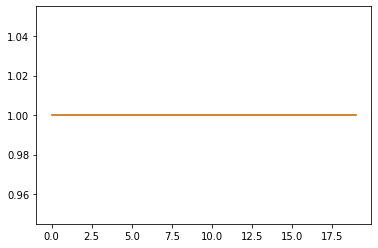

In [239]:
# plot metrics
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.show()

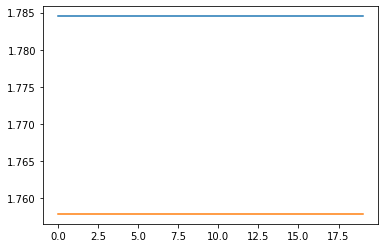

In [240]:
# plot metrics
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.show()

### TOP 10 AUTHORS

In [ ]:
finalDF = mergedST.groupby(['name'], sort=False)['review_count'].count().nlargest(n=10)
finalDF

### Negative words as feature set

In [ ]:
# Create a feature set (DOCS) of negative words

### For top n words - for each line, use word_count to get the top 10 or 20 words used. 
# Create a list from this and assign to author name | test train split | run model


In [10]:
negDocsAD = ['abysmal', 'adverse', 'alarming', 'angry', 'annoy', 'anxious', 'apathy', 'appalling', 'atrocious', 'awful', 'bad',
    'banal', 'barbed','belligerent','bemoan' ,'beneath','boring','broken', 'callous','can\\t', 'clumsy','coarse',
    'cold', 'cold-hearted','collapse','confused','contradictory','contrary','corrosive','corrupt','crazy','creepy','criminal','cruel','cry','cutting'
    ,'damage'
    ,'damaging'
    ,'dastardly'
    ,'dead'
    ,'decaying' 
    ,'deformed' 
    ,'deny'
    ,'deplorable'
    ,'depressed'
    ,'deprived'
    ,'despicable'
    ,'detrimental'
    ,'dirty'
    ,'disease'
    ,'disgusting'
    ,'disheveled'
    ,'dishonest'
    ,'dishonorable'
    ,'dismal'
    ,'distress'
    ,'dont'
    ,'dreary'
    ,'dreadful']

In [11]:
negDocsEL=['enraged'
    ,'eroding'
    ,'evil'
    ,'fail'
    ,'faulty'
    ,'fear'
    ,'feeble'
    ,'fight'
    ,'filthy'
    ,'foul'
    ,'frighten'
    ,'frightful'
    ,'gawky'
    ,'ghastly'
    ,'grave'
    ,'greed'
    ,'grim'
    ,'grimace'
    ,'gross'
    ,'grotesque'
    ,'gruesome'
    ,'guilty'
    ,'haggard'
    ,'hard'
    ,'hard-hearted'
    ,'harmful'
    ,'hate'
    ,'hideous'
    ,'homely'
    ,'horrendous'
    ,'horrible'
    ,'hostile'
    ,'hurt'
    ,'hurtful'
    ,'icky'
    ,'ignorant'
    ,'ignore'
    ,'ill'
    ,'immature'
    ,'imperfect'
    ,'impossible'
    ,'inane'
    ,'inelegant'
    ,'infernal'
    ,'injure'
    ,'injurious'
    ,'insane'
    ,'insidious'
    ,'insipid'
    ,'jealous'
    ,'junky'
    ,'lose'
    ,'lousy'
    ,'lumpy']

In [12]:
negDocsMR = ['malicious'
    ,'mean'
    ,'menacing'
    ,'messy'
    ,'misshapen'
    ,'missing'
    ,'misunderstood'
    ,'moan'
    ,'moldy'
    ,'monstrous'
    ,'naive'
    ,'nasty'
    ,'naughty'
    ,'negate'
    ,'negative'
    ,'never'
    ,'no'
    ,'nobody'
    ,'nondescript'
    ,'nonsense'
    ,'not'
    ,'noxious'
    ,'objectionable'
    ,'odious'
    ,'offensive'
    ,'old'
    ,'oppressive'
    ,'pain'
    ,'perturb'
    ,'pessimistic'
    ,'petty'
    ,'plain'
    ,'poisonous'
    ,'poor'
    ,'prejudice'
    ,'questionable'
    ,'quirky'
    ,'quit'
    ,'reject'
    ,'renege'
    ,'repellant'
    ,'reptilian'
    ,'repugnant'
    ,'repulsive'
    ,'revenge'
    ,'revolting'
    ,'rocky'
    ,'rotten'
    ,'rude'
    ,'ruthless']

In [13]:
docsNegSZ = ['sad','spring'
    ,'savage'
    ,'scare'
    ,'scary'
    ,'scream'
    ,'severe'
    ,'shocking'
    ,'shoddy'
    ,'sick'
    ,'sickening'
    ,'sinister'
    ,'slimy'
    ,'smelly'
    ,'sobbing'
    ,'sorry'
    ,'spiteful'
    ,'sticky'
    ,'stinky'
    ,'stormy'
    ,'stressful'
    ,'stuck'
    ,'stupid'
    ,'substandard'
    ,'suspect'
    ,'suspicious'
    ,'tense'
    ,'terrible'
    ,'terrifying'
    ,'threatening'
    ,'ugly'
    ,'undermine'
    ,'unfair'
    ,'unfavorable'
    ,'unhappy'
    ,'unhealthy'
    ,'unjust'
    ,'unlucky'
    ,'unpleasant'
    ,'unsatisfactory'
    ,'unsightly'
    ,'untoward'
    ,'unwanted'
    ,'unwelcome'
    ,'unwholesome'
    ,'unwieldy'
    ,'unwise'
    ,'upset'
    ,'vice'
    ,'vicious'
    ,'vile'
    ,'villainous'
    ,'vindictive'
    ,'wary'
    ,'weary'
    ,'wicked'
    ,'woeful'
    ,'worthless'
    ,'wound'
    ,'yell'
    ,'yucky'
    ,'zero']

In [14]:
totalNegDocs = negDocsAD + negDocsEL + negDocsMR + docsNegSZ

### TOP 5 AUTHORS

### Negative words as feature set

In [15]:
# Define a dictionary of negative words to be used as stylistic markers

negDict = {}


nameWordsDict = {}
for line in top20:
    for i in range(0, len(top20.index)):
        #selection = longTextDB['author'].isin(top20.index)
        #dfNeg = longTextDB[longTextDB['author'].isin(top20.index)].nunique()\n",
        dfNeg = longTextDB[longTextDB['author'].isin(top20.index)]
    
#print(dfNeg['content'].values)

# Check if negwords are present in these lines.
     
#wordDF = t.fit_on_texts(dfNeg['content'])

# iterate over the list of top20 authors
# check for presence of neg words for each of the authors
# create a dictionary of authors to negative words found

groupedDF = dfNeg.groupby(['author'],sort=False, as_index=False)

authNegVocab = {}
authNegVocab['author'] = []

for auth in top20.index:
    trial = groupedDF.get_group(auth)
    #print("\n\n\nAuthor is ", auth, "\n\n\n")
    for line in trial.content:
        #print("\n\n\n ***** \n\n\n",line)
        makeLine = line.split(" ")
        for word in makeLine:
            for elem in totalNegDocs:
                if word == elem:
                    #print("word is ", word, " and elem is ", elem)
                    #authNegVocab['author'] = elem
                    if auth not in authNegVocab:
                        authNegVocab[auth] = [elem]
                        #print("auth not in authNegVocab, adding...")
                    else:
                        authNegVocab[auth].append(elem)
                        #print("auth in authNegVocab, appending...")
                else:
                    continue
    
print(authNegVocab)


{'author': [], 'Breitbart News': ['not', 'dead', 'pain', 'not', 'not', 'hurt', 'not', 'unsatisfactory', 'suspect', 'not', 'suspect', 'not', 'not', 'suspect', 'no', 'suspect', 'fight', 'suspect', 'not', 'terrible', 'not', 'mean', 'no', 'no', 'no', 'confused', 'not', 'not', 'not', 'not', 'not', 'not', 'not', 'no', 'never', 'deprived', 'pain', 'sad', 'not', 'fight', 'never', 'not', 'old', 'no', 'no', 'fear', 'no', 'no', 'never', 'not', 'fight', 'not', 'old', 'never', 'never', 'not', 'never', 'not', 'no', 'not', 'grotesque', 'fight', 'fear', 'not', 'no', 'no', 'stuck', 'no', 'no', 'no', 'no', 'not', 'repugnant', 'not', 'not', 'not', 'not', 'not', 'not', 'criminal', 'not', 'not', 'not', 'never', 'impossible', 'not', 'tense', 'never', 'no', 'old', 'not', 'not', 'not', 'shocking', 'mean', 'not', 'not', 'not', 'not', 'not', 'mean', 'not', 'no', 'not', 'not', 'not', 'guilty', 'not', 'disgusting', 'not', 'sorry', 'hurt', 'never', 'not', 'never', 'poor', 'no', 'sorry', 'never', 'cry', 'oppressive

In [16]:
negSeries = pd.Series(authNegVocab)
negSeries



author                                                                []
Breitbart News         [not, dead, pain, not, not, hurt, not, unsatis...
Pam Key                [not, mean, not, not, not, not, yell, not, yel...
Charlie Spiering       [not, no, not, reject, not, hate, hate, unhapp...
Jerome Hudson          [not, ignore, deny, crazy, no, not, not, not, ...
John Hayward           [not, no, not, not, not, not, hard, not, hard,...
Daniel Nussbaum        [bad, bad, bad, ignore, not, no, corrupt, neve...
AWR Hawkins            [upset, not, not, negative, no, no, suspect, s...
Ian Hanchett           [hard, no, not, hard, not, bad, not, not, not,...
Joel B. Pollak         [fear, not, no, damage, hard, not, not, not, p...
Alex Swoyer            [sad, not, not, poor, not, lose, no, not, not,...
Warner Todd Huston     [impossible, not, not, no, never, not, not, no...
Jeff Poor              [not, not, fight, not, not, evil, hate, terrib...
Trent Baker            [not, bad, missing, not, not

In [58]:
# Create a dataframe with these words and add to the total top20 set

# Check how many authors are there in the negauth set

#authNegVocab[auth].nunique()

# if author is present in top20, add the relevant word-set to the 

for auth in authNegVocab.keys():
    if auth in top20.index:
        top20.insert(2,'neg words',authNegVocab['auth'], True)
    else:
        continue

print(top20)

AttributeError: 'Series' object has no attribute 'insert'

#### Steps to add other features 1. DF for top 20 authors ( also top10 and top5), add topn words, neg words and char n-grams as columns 2. test-train split and word vectorization 3. Split dataset into input and output variables based on feature set chosen 4. Run model

In [17]:
# Step 1 : Create a new full DF for top20, 10 and 5

longTextDB.head(10)

# Top20
# mergedST.loc[mergedST['name'].isin(finalDF.index)]
dftop20 = longTextDB.loc[longTextDB['author'].isin(top20.index)]
        
# Add columns for top-n words, negative vocab and char n-grams
# dftop20new= pd.DataFrame()

# for auth in topNwords.keys():
#      dftop20new[auth] = pd.Series(list(topNwords.values()))
     
# # convert the dictionary to a pandas dataframe
# dftop20new=dftop20new.transpose()
# dftop20new.head()
dftop20

,author,content
7803,Ian Hanchett,On Tuesday’s broadcast of CNN’s “Situation Roo...
7804,Katherine Rodriguez,A group of American spring break revelers repo...
7809,Jerome Hudson,A group of Hollywood celebrities is urging Ame...
7812,Dr. Susan Berry,Drug stocks plummeted as Donald Trump announ...
7814,Ben Kew,"Two helicopters, an FBI bomb squad and riot po..."
...,...,...
31572,Ben Kew,Hillary Clinton’s campaign chief John Podesta ...
31575,Charlie Spiering,“The question about ‘Whether you give citizens...
31576,AWR Hawkins,A Fontana resident faces charges of animal cru...
31580,Alex Swoyer,2016 GOP presidential candidate and former Hew...


In [19]:
X = dftop20.iloc[:,0:1]
y = dftop20.iloc[:,1]

print(X.shape)
print(y.shape)

(12874, 1)
(12874,)


In [20]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10299, 1)
(10299,)
(2575, 1)
(2575,)


In [32]:
top20Grouped = dftop20.groupby('author')
top20Grouped.head()


,author,content
7803,Ian Hanchett,On Tuesday’s broadcast of CNN’s “Situation Roo...
7804,Katherine Rodriguez,A group of American spring break revelers repo...
7809,Jerome Hudson,A group of Hollywood celebrities is urging Ame...
7812,Dr. Susan Berry,Drug stocks plummeted as Donald Trump announ...
7814,Ben Kew,"Two helicopters, an FBI bomb squad and riot po..."
...,...,...
10050,Alex Swoyer,Donald Trump’s spokesman Sean Spicer pressed...
10179,Alex Swoyer,Donald Trump is using Twitter to criticize t...
11150,Alex Swoyer,Hillary Clinton is reportedly being pressured ...
11693,Alex Swoyer,Donald Trump took to Twitter on Thursday to ...


### Top n-words using the nlargest within each line. The same for loop may be re-used.

In [18]:
from keras.preprocessing.text import Tokenizer
t = Tokenizer()

In [19]:
topNwords = pd.DataFrame()
topNwordstrain = pd.DataFrame()
topNwordstest = pd.DataFrame()

from operator import itemgetter
import heapq
# from collections import Counter
authContent=[]
newlistOfWords=[]
counter = 400

for auth in top20.index: 
    #if (auth == 'Pam Key') or (auth=='Ben Kew'):
    #if auth == 'Pam Key': 
        print("Author is:", auth)
        trial = groupedDF.get_group(auth)

        for line in trial.content:
            authContent.append(line)

        t.fit_on_texts(authContent)
        wc=t.word_counts

    #     k = Counter(wc)
    #     top100words = k.most_common(100)
    #     print(top100words)

        newlistOfWords1= heapq.nlargest(200, wc, key=wc.get)
        
        sortedDict = dict(sorted(wc.items(), key=itemgetter(1), reverse=True)[:500])
        newlistOfWords = heapq.nsmallest(100, sortedDict, key=sortedDict.get)
        #listOfWords = top100words.keys
        newlistOfWords1 = newlistOfWords[:80]
        newlistOfWords2 = newlistOfWords[81:]
        
        #print("\n\n*** list of words is ", newlistOfWords)     
        if auth not in topNwords:
                topNwordstrain[auth] = [newlistOfWords1]
                topNwordstest[auth] = [newlistOfWords2]
                
                print("auth not in authNegVocab, adding...")
                #print("in new auth, series is ",  topNwords[auth])
        else:
               
                topNwordstrain[auth].append([newlistOfWords1])
                topNwordstest[auth].append([newlistOfWords2])
                
                #print("auth in authNegVocab, appending...")
                 

print("\n*** train", topNwordstrain)
print("\n*** test", topNwordstest)


Author is: Breitbart News
auth not in authNegVocab, adding...
Author is: Pam Key
auth not in authNegVocab, adding...
Author is: Charlie Spiering
auth not in authNegVocab, adding...
Author is: Jerome Hudson
auth not in authNegVocab, adding...
Author is: John Hayward
auth not in authNegVocab, adding...
Author is: Daniel Nussbaum
auth not in authNegVocab, adding...
Author is: AWR Hawkins
auth not in authNegVocab, adding...
Author is: Ian Hanchett
auth not in authNegVocab, adding...
Author is: Joel B. Pollak
auth not in authNegVocab, adding...
Author is: Alex Swoyer
auth not in authNegVocab, adding...
Author is: Warner Todd Huston
auth not in authNegVocab, adding...
Author is: Jeff Poor
auth not in authNegVocab, adding...
Author is: Trent Baker
auth not in authNegVocab, adding...
Author is: Breitbart London
auth not in authNegVocab, adding...
Author is: Katherine Rodriguez
auth not in authNegVocab, adding...
Author is: Charlie Nash
auth not in authNegVocab, adding...
Author is: Ben Kew
aut

In [131]:
topNwords = topNwordstrain + topNwordstest
topNwords

""


In [39]:
topNwordstrain = topNwordstrain.transpose()
topNwordstrain

,0
Breitbart News,"[past, across, “it, message, young, reportedly..."
Pam Key,"[past, across, young, message, reportedly, ear..."
Charlie Spiering,"[officers, himself, across, young, earlier, be..."
Jerome Hudson,"[himself, discuss, across, earlier, young, bec..."
John Hayward,"[“it, himself, across, young, discuss, become,..."
Daniel Nussbaum,"[across, himself, “it, discuss, young, free, b..."
AWR Hawkins,"[himself, reportedly, “it, free, discuss, satu..."
Ian Hanchett,"[himself, free, discuss, saturday, “it, j, rep..."
Joel B. Pollak,"[himself, earlier, saturday, free, j, “it, you..."
Alex Swoyer,"[siriusxm, free, j, saturday, earlier, young, ..."


In [41]:
topNwordstest = topNwordstest.transpose()
topNwordstest

,0
Breitbart News,"[running, senior, “this, investigation, rights..."
Pam Key,"[trade, running, rights, “this, investigation,..."
Charlie Spiering,"[rights, “this, investigation, keep, com, runn..."
Jerome Hudson,"[always, rights, keep, “this, investigation, m..."
John Hayward,"[south, always, keep, monday, investigation, “..."
Daniel Nussbaum,"[let, always, keep, investigation, monday, run..."
AWR Hawkins,"[let, always, investigation, monday, keep, run..."
Ian Hanchett,"[let, investigation, always, monday, running, ..."
Joel B. Pollak,"[rights, investigation, always, monday, team, ..."
Alex Swoyer,"[rights, team, investigation, always, monday, ..."


In [44]:
X_train = topNwordstrain.values
X_train

X_test = topNwordstest.values
X_test

array([[list(['running', 'senior', '“this', 'investigation', 'rights', 'keep', 'monday', 'team', 'issues', 'obama’s', 'mean', '25', 'attacks', 'making', 'seen', 'morning', 'com', 'florida', 'issue'])],
       [list(['trade', 'running', 'rights', '“this', 'investigation', 'keep', 'monday', 'obama’s', 'com', 'team', 'issues', 'making', 'mean', 'attacks', 'morning', 'seen', 'issue', '25', 'florida'])],
       [list(['rights', '“this', 'investigation', 'keep', 'com', 'running', 'monday', 'trade', 'obama’s', 'team', 'making', 'issues', 'seen', 'mean', 'morning', 'attacks', 'issue', 'number', 'later'])],
       [list(['always', 'rights', 'keep', '“this', 'investigation', 'monday', 'running', 'trade', 'obama’s', 'team', 'making', 'number', 'seen', 'issues', 'morning', 'mean', 'issue', 'attacks', 'later'])],
       [list(['south', 'always', 'keep', 'monday', 'investigation', '“this', 'running', 'trade', 'obama’s', 'team', 'number', 'later', 'morning', 'making', 'seen', 'issue', 'attacks', 'mea

In [48]:
y_train = topNwordstrain.index
y_train

y_test = topNwordstest.index
y_test

Index(['Breitbart News', 'Pam Key', 'Charlie Spiering', 'Jerome Hudson',
       'John Hayward', 'Daniel Nussbaum', 'AWR Hawkins', 'Ian Hanchett',
       'Joel B. Pollak', 'Alex Swoyer', 'Warner Todd Huston', 'Jeff Poor',
       'Trent Baker', 'Breitbart London', 'Katherine Rodriguez',
       'Charlie Nash', 'Ben Kew', 'Frances Martel', 'Bob Price',
       'Dr. Susan Berry'],
      dtype='object')

In [56]:
# Tokenization of words X train

from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence

vocSizeList = []
hashList=[]

text = ''

for auth in topNwordstrain.index:
       
        print("******* auth is ****** ", auth)
        for line in topNwordstrain.values:
                    #for i in range(0,len(topNwordstrain.values)):
                    text = text + ' ' + str(line)

                    seq_words = set(text_to_word_sequence(text))   
                    vocab_size = len(seq_words)
                    vocSizeList.append(vocab_size)

                    result = hashing_trick(text, round(vocab_size*2), hash_function='md5')
                    hashList.append(result)

******* auth is ******  Breitbart News
******* auth is ******  Pam Key
******* auth is ******  Charlie Spiering
******* auth is ******  Jerome Hudson
******* auth is ******  John Hayward
******* auth is ******  Daniel Nussbaum
******* auth is ******  AWR Hawkins
******* auth is ******  Ian Hanchett
******* auth is ******  Joel B. Pollak
******* auth is ******  Alex Swoyer
******* auth is ******  Warner Todd Huston
******* auth is ******  Jeff Poor
******* auth is ******  Trent Baker
******* auth is ******  Breitbart London
******* auth is ******  Katherine Rodriguez
******* auth is ******  Charlie Nash
******* auth is ******  Ben Kew
******* auth is ******  Frances Martel
******* auth is ******  Bob Price
******* auth is ******  Dr. Susan Berry


In [58]:
test_string_new = hashList
test_string_new

for elem in test_string_new:
    #print(elem)
    elem = str(elem)
    #print(type(elem))
    

In [60]:
topNDF = pd.DataFrame([hashList])
#highFreqDF['Pam Key'] = pd.DataFrame([hashListHighFreq])

topNDF=topNDF.transpose()
topNDF

,0
0,"[121, 77, 8, 29, 28, 37, 139, 40, 114, 35, 47,..."
1,"[72, 43, 143, 102, 12, 61, 3, 27, 5, 71, 29, 5..."
2,"[19, 105, 90, 127, 46, 114, 55, 108, 86, 17, 9..."
3,"[30, 152, 169, 5, 148, 162, 102, 151, 16, 123,..."
4,"[52, 22, 78, 136, 134, 166, 134, 66, 117, 51, ..."
...,...
395,"[126, 22, 37, 43, 93, 80, 51, 60, 106, 83, 69,..."
396,"[126, 22, 37, 43, 93, 80, 51, 60, 106, 83, 69,..."
397,"[126, 22, 37, 43, 93, 80, 51, 60, 106, 83, 69,..."
398,"[126, 22, 37, 43, 93, 80, 51, 60, 106, 83, 69,..."


In [61]:
# Tokenization of words X test

from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence

vocSizeListTopNXtest= []
hashListTopNXtest=[]

text = ''

for auth in topNwordstest.index:
       
        print("******* auth is ****** ", auth)
        for line in topNwordstest.values:
                    #for i in range(0,len(topNwordstrain.values)):
                    text = text + ' ' + str(line)

                    seq_words = set(text_to_word_sequence(text))   
                    vocab_size = len(seq_words)
                    vocSizeListTopNXtest.append(vocab_size)

                    result = hashing_trick(text, round(vocab_size*2), hash_function='md5')
                    hashListTopNXtest.append(result)

******* auth is ******  Breitbart News
******* auth is ******  Pam Key
******* auth is ******  Charlie Spiering
******* auth is ******  Jerome Hudson
******* auth is ******  John Hayward
******* auth is ******  Daniel Nussbaum
******* auth is ******  AWR Hawkins
******* auth is ******  Ian Hanchett
******* auth is ******  Joel B. Pollak
******* auth is ******  Alex Swoyer
******* auth is ******  Warner Todd Huston
******* auth is ******  Jeff Poor
******* auth is ******  Trent Baker
******* auth is ******  Breitbart London
******* auth is ******  Katherine Rodriguez
******* auth is ******  Charlie Nash
******* auth is ******  Ben Kew
******* auth is ******  Frances Martel
******* auth is ******  Bob Price
******* auth is ******  Dr. Susan Berry


In [65]:
test_string_new = hashListTopNXtest
test_string_new

for elem in test_string_new:
    #print(elem)
    elem = str(elem)
    #print(type(elem))
    
topNDFXtest = pd.DataFrame([hashListTopNXtest])
#highFreqDF['Pam Key'] = pd.DataFrame([hashListHighFreq])

topNDFXtest=topNDFXtest.transpose()
topNDFXtest


,0
0,"[30, 27, 22, 27, 32, 33, 36, 13, 25, 6, 34, 24..."
1,"[9, 10, 12, 19, 38, 26, 32, 37, 40, 11, 40, 19..."
2,"[39, 15, 25, 30, 38, 21, 45, 28, 28, 3, 40, 6,..."
3,"[40, 27, 35, 18, 45, 36, 47, 42, 36, 20, 15, 2..."
4,"[44, 32, 1, 47, 31, 18, 44, 16, 10, 10, 34, 31..."
...,...
395,"[9, 56, 21, 46, 1, 40, 65, 59, 5, 33, 13, 43, ..."
396,"[9, 56, 21, 46, 1, 40, 65, 59, 5, 33, 13, 43, ..."
397,"[9, 56, 21, 46, 1, 40, 65, 59, 5, 33, 13, 43, ..."
398,"[9, 56, 21, 46, 1, 40, 65, 59, 5, 33, 13, 43, ..."


In [64]:
# Tokenization of words y train

from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence

vocSizeListytrain= []
hashListytrain=[]

text = ''

for auth in topNwordstest.index:
       
        print("******* auth is ****** ", auth)
        for line in topNwordstrain.index:
                    #for i in range(0,len(topNwordstrain.values)):
                    text = text + ' ' + str(line)

                    seq_words = set(text_to_word_sequence(text))   
                    vocab_size = len(seq_words)
                    vocSizeListytrain.append(vocab_size)

                    result = hashing_trick(text, round(vocab_size*2), hash_function='md5')
                    hashListytrain.append(result)

******* auth is ******  Breitbart News
******* auth is ******  Pam Key
******* auth is ******  Charlie Spiering
******* auth is ******  Jerome Hudson
******* auth is ******  John Hayward
******* auth is ******  Daniel Nussbaum
******* auth is ******  AWR Hawkins
******* auth is ******  Ian Hanchett
******* auth is ******  Joel B. Pollak
******* auth is ******  Alex Swoyer
******* auth is ******  Warner Todd Huston
******* auth is ******  Jeff Poor
******* auth is ******  Trent Baker
******* auth is ******  Breitbart London
******* auth is ******  Katherine Rodriguez
******* auth is ******  Charlie Nash
******* auth is ******  Ben Kew
******* auth is ******  Frances Martel
******* auth is ******  Bob Price
******* auth is ******  Dr. Susan Berry


In [67]:
test_string_new = hashListytrain
test_string_new

for elem in test_string_new:
    #print(elem)
    elem = str(elem)
    #print(type(elem))
    
topNDFytrain = pd.DataFrame([hashListytrain])
#highFreqDF['Pam Key'] = pd.DataFrame([hashListHighFreq])

topNDFytrain=topNDFytrain.transpose()
topNDFytrain

,0
0,"[3, 2]"
1,"[6, 4, 2, 5]"
2,"[8, 7, 5, 1, 9, 7]"
3,"[12, 8, 7, 12, 4, 13, 7, 11]"
4,"[11, 17, 13, 4, 12, 14, 18, 18, 18, 13]"
...,...
395,"[24, 20, 13, 6, 4, 76, 52, 20, 14, 28, 42, 43,..."
396,"[24, 20, 13, 6, 4, 76, 52, 20, 14, 28, 42, 43,..."
397,"[24, 20, 13, 6, 4, 76, 52, 20, 14, 28, 42, 43,..."
398,"[24, 20, 13, 6, 4, 76, 52, 20, 14, 28, 42, 43,..."


In [97]:
len(topNwordstest.index)

20

In [68]:
# Tokenization of words y test

from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence

vocSizeListytest= []
hashListytest=[]

text = ''

for auth in topNwordstest.index:
       
        print("******* auth is ****** ", auth)
        for line in topNwordstest.index:
                    #for i in range(0,len(topNwordstrain.values)):
                    text = text + ' ' + str(line)

                    seq_words = set(text_to_word_sequence(text))   
                    vocab_size = len(seq_words)
                    vocSizeListytest.append(vocab_size)

                    result = hashing_trick(text, round(vocab_size*2), hash_function='md5')
                    hashListytest.append(result)

******* auth is ******  Breitbart News
******* auth is ******  Pam Key
******* auth is ******  Charlie Spiering
******* auth is ******  Jerome Hudson
******* auth is ******  John Hayward
******* auth is ******  Daniel Nussbaum
******* auth is ******  AWR Hawkins
******* auth is ******  Ian Hanchett
******* auth is ******  Joel B. Pollak
******* auth is ******  Alex Swoyer
******* auth is ******  Warner Todd Huston
******* auth is ******  Jeff Poor
******* auth is ******  Trent Baker
******* auth is ******  Breitbart London
******* auth is ******  Katherine Rodriguez
******* auth is ******  Charlie Nash
******* auth is ******  Ben Kew
******* auth is ******  Frances Martel
******* auth is ******  Bob Price
******* auth is ******  Dr. Susan Berry


In [69]:
test_string_new = hashListytest
test_string_new

for elem in test_string_new:
    #print(elem)
    elem = str(elem)
    #print(type(elem))
    
topNDFytest = pd.DataFrame([hashListytest])
#highFreqDF['Pam Key'] = pd.DataFrame([hashListHighFreq])

topNDFytest=topNDFytest.transpose()
topNDFytest

,0
0,"[3, 2]"
1,"[6, 4, 2, 5]"
2,"[8, 7, 5, 1, 9, 7]"
3,"[12, 8, 7, 12, 4, 13, 7, 11]"
4,"[11, 17, 13, 4, 12, 14, 18, 18, 18, 13]"
...,...
395,"[24, 20, 13, 6, 4, 76, 52, 20, 14, 28, 42, 43,..."
396,"[24, 20, 13, 6, 4, 76, 52, 20, 14, 28, 42, 43,..."
397,"[24, 20, 13, 6, 4, 76, 52, 20, 14, 28, 42, 43,..."
398,"[24, 20, 13, 6, 4, 76, 52, 20, 14, 28, 42, 43,..."


In [101]:
blank1topn=[]

for i in range(0,len(topNDF)):
    for j in range(0, len(topNDF[0][i])):
        x_train_arr = topNDF[0][i][j]
        blank1topn.append(x_train_arr)

#print(blank1)

xTrain_arr = np.asarray(blank1topn)
# print("************", xTrain_arr.dtype)

# # # # *****************************

blank2topn=[]

for j in range(0,len(topNDFytrain)):
    for k in range(0, len(topNDFytrain[0][j])):
        y_train_arr = topNDFytrain[0][j][k]
        blank2topn.append(y_train_arr)

yTrain_arr = np.asarray(blank2topn)
# print("************", yTrain_arr.dtype)

# # *****************************
        
blank3topn=[]

topNDFXtest = topNDFXtest.transpose()

for i in range(0,len(topNDFXtest)):
    for j in range(0, len(topNDFXtest[0][i])):
        x_test_arr = topNDFXtest[0][i][0]
        blank3topn.append(x_test_arr)

x_test_arr = np.asarray(blank3topn)
print("************", x_test_arr.dtype)

# # # # *****************************

blank4topn=[]

for j in range(0,len(topNDFytest)):
    for k in range(0, len(topNDFytest[0][j])):
        y_test_arr = topNDFytest[0][j][k]
        blank4topn.append(y_test_arr)
        
y_test_arr = np.asarray(blank4topn) 
print("************", y_test_arr.dtype)

# # # # ************************

************ int32
************ int32


In [102]:
topNDFXtest

,0
0,"[30, 27, 22, 27, 32, 33, 36, 13, 25, 6, 34, 24..."
1,"[9, 10, 12, 19, 38, 26, 32, 37, 40, 11, 40, 19..."
2,"[39, 15, 25, 30, 38, 21, 45, 28, 28, 3, 40, 6,..."
3,"[40, 27, 35, 18, 45, 36, 47, 42, 36, 20, 15, 2..."
4,"[44, 32, 1, 47, 31, 18, 44, 16, 10, 10, 34, 31..."
...,...
395,"[9, 56, 21, 46, 1, 40, 65, 59, 5, 33, 13, 43, ..."
396,"[9, 56, 21, 46, 1, 40, 65, 59, 5, 33, 13, 43, ..."
397,"[9, 56, 21, 46, 1, 40, 65, 59, 5, 33, 13, 43, ..."
398,"[9, 56, 21, 46, 1, 40, 65, 59, 5, 33, 13, 43, ..."


,0


In [134]:
backupdf

NameError: name 'backupdf' is not defined

### Character n grams 

#### 2-gram  | 5 grams | 10 grams | Remove the words that have length < 2

In [27]:
twogramAuth={}
fivegramAuth={}
tengramAuth={}
fivegramAuth1={}
for auth in top20.index:
    trial = groupedDF.get_group(auth)
    wordList=[]
    
    for line in trial.content:
            wordList = line.split(" ")
            for word in wordList:
                # Remove 
                if len(word)<2:
                    #print("\n***\n word is ", word, " and length is :",len(word))
                    line.lstrip(word)
                    #lineSeq = t.texts_to_sequences(line)
                    
            # assign these 2, 5 and 10 gram characters to authors.
            
            # word 2 grams
            twoGram = [line[i:i+2] for i in range(len(line)-1)]
 
#             if auth not in twogramAuth:
#                 twogramAuth[auth] = twoGram
#                 #print("\n*** Auth is ", auth, "not in 2gram, adding..\n")
#             else:
#                 twogramAuth[auth].append(twoGram)
#                 #print("\n*** Auth is ", auth, "in 2gram, appending..\n")
                
            #word 5 grams
            fiveGram = [line[i:i+5] for i in range(len(line)-1)]
            
            if auth not in fivegramAuth:
                fivegramAuth[auth] = fiveGram[:1000]
                fivegramAuth1[auth] = fiveGram[1001:]
            else:
                fivegramAuth[auth].append(fiveGram)
                fivegramAuth1[auth].append(fiveGram)
#             # word 10 grams
#             tenGram = [line[i:i+10] for i in range(len(line)-1)]
            
#             if auth not in tengramAuth:
#                 tengramAuth[auth] = tenGram
#             else:
#                 tengramAuth[auth].append(tenGram)


1859

#### character 5 grams

In [28]:
fivegramDF1 = pd.Series(fivegramAuth1)
fivegramDF1

fivegramDF = pd.Series(fivegramAuth)
fivegramDF

Breitbart News         [Advoc, dvoca, vocat, ocate, cates, ates , tes...
Pam Key                [Sunda, unday, nday , day o, ay on, y on ,  on...
Charlie Spiering       [Presi, resid, eside, siden, ident, dent , ent...
Jerome Hudson          [A gro,  grou, group, roup , oup o, up of, p o...
John Hayward           [Rep. , ep. P, p. Ph, . Phi,  Phil, Phil , hil...
Daniel Nussbaum        [Jerry, erry , rry S, ry Se, y Sei,  Sein, Sei...
AWR Hawkins            [Illeg, llega, legal, egal , gal a, al al, l a...
Ian Hanchett           [On Tu, n Tue,  Tues, Tuesd, uesda, esday, sda...
Joel B. Pollak         [Gold , old S, ld St, d Sta,  Star, Star , tar...
Alex Swoyer            [  Don,  Dona, Donal, onald, nald , ald T, ld ...
Warner Todd Huston     [Kello, ellog, llogg, logg , ogg C, gg Co, g C...
Jeff Poor              [.@tom, @tomb, tombr, ombro, mbrok, broka, rok...
Trent Baker            [Tuesd, uesda, esday, sday , day o, ay on, y o...
Breitbart London       [LONDO, ONDON, NDON , DON (,

### char 5 gram model run

In [ ]:
fivegramDF1.values

In [52]:
tengramDF = pd.Series(tengramAuth)
tengramDF

Breitbart News         [Advocates , dvocates w, vocates wh, ocates wh...
Pam Key                [Sunday on , unday on C, nday on CB, day on CB...
Charlie Spiering       [President , resident D, esident Do, sident Do...
Jerome Hudson          [A group of,  group of , group of H, roup of H...
John Hayward           [Rep. Phil , ep. Phil R, p. Phil Ro, . Phil Ro...
Daniel Nussbaum        [Jerry Sein, erry Seinf, rry Seinfe, ry Seinfe...
AWR Hawkins            [Illegal al, llegal ali, legal alie, egal alie...
Ian Hanchett           [On Tuesday, n Tuesday’,  Tuesday’s, Tuesday’s...
Joel B. Pollak         [Gold Star , old Star f, ld Star fa, d Star fa...
Alex Swoyer            [  Donald T,  Donald Tr, Donald Tru, onald Tru...
Warner Todd Huston     [Kellogg Co, ellogg Com, llogg Comp, logg Comp...
Jeff Poor              [.@tombroka, @tombrokaw, tombrokaw:, ombrokaw:...
Trent Baker            [Tuesday on, uesday on , esday on F, sday on F...
Breitbart London       [LONDON (AP, ONDON (AP), NDO

In [53]:
twogramDF = pd.Series(twogramAuth)
twogramDF

Breitbart News         [Ad, dv, vo, oc, ca, at, te, es, s ,  w, wh, h...
Pam Key                [Su, un, nd, da, ay, y ,  o, on, n ,  C, CB, B...
Charlie Spiering       [Pr, re, es, si, id, de, en, nt, t ,  D, Do, o...
Jerome Hudson          [A ,  g, gr, ro, ou, up, p ,  o, of, f ,  H, H...
John Hayward           [Re, ep, p., . ,  P, Ph, hi, il, l ,  R, Ro, o...
Daniel Nussbaum        [Je, er, rr, ry, y ,  S, Se, ei, in, nf, fe, e...
AWR Hawkins            [Il, ll, le, eg, ga, al, l ,  a, al, li, ie, e...
Ian Hanchett           [On, n ,  T, Tu, ue, es, sd, da, ay, y’, ’s, s...
Joel B. Pollak         [Go, ol, ld, d ,  S, St, ta, ar, r ,  f, fa, a...
Alex Swoyer            [  ,  D, Do, on, na, al, ld, d ,  T, Tr, ru, u...
Warner Todd Huston     [Ke, el, ll, lo, og, gg, g ,  C, Co, om, mp, p...
Jeff Poor              [.@, @t, to, om, mb, br, ro, ok, ka, aw, w:, :...
Trent Baker            [Tu, ue, es, sd, da, ay, y ,  o, on, n ,  F, F...
Breitbart London       [LO, ON, ND, DO, ON, N ,  (,

In [126]:
# To this DF topNwords, add negative words list and char n grams as columns

topNwords2 = topNwordstrain
topNwords2

topNwords

""


In [36]:
topNwords = topNwords.transpose()
topNwords

,0
Breitbart News,"[second, ago, become, editor, voting, mainstre..."
Pam Key,"[’, writes, plan, ago, reporter, north, nevada..."
Charlie Spiering,"[information, north, bad, plan, line, love, we..."
Jerome Hudson,"[tells, conference, north, decision, keep, rep..."
John Hayward,"[book, updates, needs, meeting, clear, hard, c..."
Daniel Nussbaum,"[military, together, number, understand, islam..."
AWR Hawkins,"[few, rights, romney, woman, hard, officials, ..."
Ian Hanchett,"[illegal, officials, delegates, crowd, young, ..."
Joel B. Pollak,"[together, become, street, officials, reported..."
Alex Swoyer,"[officials, together, young, himself, understa..."


In [118]:
topNwordsnew = topNwords
topNwordsnew['char2gram']= twogramDF
topNwordsnew['char5gram']= fivegramDF
topNwordsnew['char10gram']= tengramDF



NameError: name 'twogramDF' is not defined

In [56]:
topNwordsnew = topNwordsnew.rename(columns={0:'High Freq Words'})
topNwordsnew

,High Freq Words,char2gram,char5gram,char10gram
Breitbart News,"[second, ago, become, editor, voting, mainstre...","[Ad, dv, vo, oc, ca, at, te, es, s , w, wh, h...","[Advoc, dvoca, vocat, ocate, cates, ates , tes...","[Advocates , dvocates w, vocates wh, ocates wh..."
Pam Key,"[’, writes, plan, ago, reporter, north, nevada...","[Su, un, nd, da, ay, y , o, on, n , C, CB, B...","[Sunda, unday, nday , day o, ay on, y on , on...","[Sunday on , unday on C, nday on CB, day on CB..."
Charlie Spiering,"[information, north, bad, plan, line, love, we...","[Pr, re, es, si, id, de, en, nt, t , D, Do, o...","[Presi, resid, eside, siden, ident, dent , ent...","[President , resident D, esident Do, sident Do..."
Jerome Hudson,"[tells, conference, north, decision, keep, rep...","[A , g, gr, ro, ou, up, p , o, of, f , H, H...","[A gro, grou, group, roup , oup o, up of, p o...","[A group of, group of , group of H, roup of H..."
John Hayward,"[book, updates, needs, meeting, clear, hard, c...","[Re, ep, p., . , P, Ph, hi, il, l , R, Ro, o...","[Rep. , ep. P, p. Ph, . Phi, Phil, Phil , hil...","[Rep. Phil , ep. Phil R, p. Phil Ro, . Phil Ro..."
Daniel Nussbaum,"[military, together, number, understand, islam...","[Je, er, rr, ry, y , S, Se, ei, in, nf, fe, e...","[Jerry, erry , rry S, ry Se, y Sei, Sein, Sei...","[Jerry Sein, erry Seinf, rry Seinfe, ry Seinfe..."
AWR Hawkins,"[few, rights, romney, woman, hard, officials, ...","[Il, ll, le, eg, ga, al, l , a, al, li, ie, e...","[Illeg, llega, legal, egal , gal a, al al, l a...","[Illegal al, llegal ali, legal alie, egal alie..."
Ian Hanchett,"[illegal, officials, delegates, crowd, young, ...","[On, n , T, Tu, ue, es, sd, da, ay, y’, ’s, s...","[On Tu, n Tue, Tues, Tuesd, uesda, esday, sda...","[On Tuesday, n Tuesday’, Tuesday’s, Tuesday’s..."
Joel B. Pollak,"[together, become, street, officials, reported...","[Go, ol, ld, d , S, St, ta, ar, r , f, fa, a...","[Gold , old S, ld St, d Sta, Star, Star , tar...","[Gold Star , old Star f, ld Star fa, d Star fa..."
Alex Swoyer,"[officials, together, young, himself, understa...","[ , D, Do, on, na, al, ld, d , T, Tr, ru, u...","[ Don, Dona, Donal, onald, nald , ald T, ld ...","[ Donald T, Donald Tr, Donald Tru, onald Tru..."


In [57]:
topNwordsnew['Negative markers'] = negSeries

In [58]:
topNwordsnew

,High Freq Words,char2gram,char5gram,char10gram,Negative markers
Breitbart News,"[second, ago, become, editor, voting, mainstre...","[Ad, dv, vo, oc, ca, at, te, es, s , w, wh, h...","[Advoc, dvoca, vocat, ocate, cates, ates , tes...","[Advocates , dvocates w, vocates wh, ocates wh...","[not, dead, pain, not, not, hurt, not, unsatis..."
Pam Key,"[’, writes, plan, ago, reporter, north, nevada...","[Su, un, nd, da, ay, y , o, on, n , C, CB, B...","[Sunda, unday, nday , day o, ay on, y on , on...","[Sunday on , unday on C, nday on CB, day on CB...","[not, mean, not, not, not, not, yell, not, yel..."
Charlie Spiering,"[information, north, bad, plan, line, love, we...","[Pr, re, es, si, id, de, en, nt, t , D, Do, o...","[Presi, resid, eside, siden, ident, dent , ent...","[President , resident D, esident Do, sident Do...","[not, no, not, reject, not, hate, hate, unhapp..."
Jerome Hudson,"[tells, conference, north, decision, keep, rep...","[A , g, gr, ro, ou, up, p , o, of, f , H, H...","[A gro, grou, group, roup , oup o, up of, p o...","[A group of, group of , group of H, roup of H...","[not, ignore, deny, crazy, no, not, not, not, ..."
John Hayward,"[book, updates, needs, meeting, clear, hard, c...","[Re, ep, p., . , P, Ph, hi, il, l , R, Ro, o...","[Rep. , ep. P, p. Ph, . Phi, Phil, Phil , hil...","[Rep. Phil , ep. Phil R, p. Phil Ro, . Phil Ro...","[not, no, not, not, not, not, hard, not, hard,..."
Daniel Nussbaum,"[military, together, number, understand, islam...","[Je, er, rr, ry, y , S, Se, ei, in, nf, fe, e...","[Jerry, erry , rry S, ry Se, y Sei, Sein, Sei...","[Jerry Sein, erry Seinf, rry Seinfe, ry Seinfe...","[bad, bad, bad, ignore, not, no, corrupt, neve..."
AWR Hawkins,"[few, rights, romney, woman, hard, officials, ...","[Il, ll, le, eg, ga, al, l , a, al, li, ie, e...","[Illeg, llega, legal, egal , gal a, al al, l a...","[Illegal al, llegal ali, legal alie, egal alie...","[upset, not, not, negative, no, no, suspect, s..."
Ian Hanchett,"[illegal, officials, delegates, crowd, young, ...","[On, n , T, Tu, ue, es, sd, da, ay, y’, ’s, s...","[On Tu, n Tue, Tues, Tuesd, uesda, esday, sda...","[On Tuesday, n Tuesday’, Tuesday’s, Tuesday’s...","[hard, no, not, hard, not, bad, not, not, not,..."
Joel B. Pollak,"[together, become, street, officials, reported...","[Go, ol, ld, d , S, St, ta, ar, r , f, fa, a...","[Gold , old S, ld St, d Sta, Star, Star , tar...","[Gold Star , old Star f, ld Star fa, d Star fa...","[fear, not, no, damage, hard, not, not, not, p..."
Alex Swoyer,"[officials, together, young, himself, understa...","[ , D, Do, on, na, al, ld, d , T, Tr, ru, u...","[ Don, Dona, Donal, onald, nald , ald T, ld ...","[ Donald T, Donald Tr, Donald Tru, onald Tru...","[sad, not, not, poor, not, lose, no, not, not,..."


In [61]:
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization
import re
import string
import random

In [ ]:
# Data pre-processing on the newly generated dataset with all feature sets


In [63]:
# Check for null values. Remove special characters - replace with ' '.

topNwordsnew.isnull().value_counts()

High Freq Words  char2gram  char5gram  char10gram  Negative markers
False            False      False      False       False               20
dtype: int64

In [59]:
#df = df.replace(r'[^\w\s]|_', '', regex=True)
topNwordsnew = topNwordsnew.replace(r'[^\w\s]|_*@#$', '', regex=True)

In [60]:
topNwordsnew

,High Freq Words,char2gram,char5gram,char10gram,Negative markers
Breitbart News,"[second, ago, become, editor, voting, mainstre...","[Ad, dv, vo, oc, ca, at, te, es, s , w, wh, h...","[Advoc, dvoca, vocat, ocate, cates, ates , tes...","[Advocates , dvocates w, vocates wh, ocates wh...","[not, dead, pain, not, not, hurt, not, unsatis..."
Pam Key,"[’, writes, plan, ago, reporter, north, nevada...","[Su, un, nd, da, ay, y , o, on, n , C, CB, B...","[Sunda, unday, nday , day o, ay on, y on , on...","[Sunday on , unday on C, nday on CB, day on CB...","[not, mean, not, not, not, not, yell, not, yel..."
Charlie Spiering,"[information, north, bad, plan, line, love, we...","[Pr, re, es, si, id, de, en, nt, t , D, Do, o...","[Presi, resid, eside, siden, ident, dent , ent...","[President , resident D, esident Do, sident Do...","[not, no, not, reject, not, hate, hate, unhapp..."
Jerome Hudson,"[tells, conference, north, decision, keep, rep...","[A , g, gr, ro, ou, up, p , o, of, f , H, H...","[A gro, grou, group, roup , oup o, up of, p o...","[A group of, group of , group of H, roup of H...","[not, ignore, deny, crazy, no, not, not, not, ..."
John Hayward,"[book, updates, needs, meeting, clear, hard, c...","[Re, ep, p., . , P, Ph, hi, il, l , R, Ro, o...","[Rep. , ep. P, p. Ph, . Phi, Phil, Phil , hil...","[Rep. Phil , ep. Phil R, p. Phil Ro, . Phil Ro...","[not, no, not, not, not, not, hard, not, hard,..."
Daniel Nussbaum,"[military, together, number, understand, islam...","[Je, er, rr, ry, y , S, Se, ei, in, nf, fe, e...","[Jerry, erry , rry S, ry Se, y Sei, Sein, Sei...","[Jerry Sein, erry Seinf, rry Seinfe, ry Seinfe...","[bad, bad, bad, ignore, not, no, corrupt, neve..."
AWR Hawkins,"[few, rights, romney, woman, hard, officials, ...","[Il, ll, le, eg, ga, al, l , a, al, li, ie, e...","[Illeg, llega, legal, egal , gal a, al al, l a...","[Illegal al, llegal ali, legal alie, egal alie...","[upset, not, not, negative, no, no, suspect, s..."
Ian Hanchett,"[illegal, officials, delegates, crowd, young, ...","[On, n , T, Tu, ue, es, sd, da, ay, y’, ’s, s...","[On Tu, n Tue, Tues, Tuesd, uesda, esday, sda...","[On Tuesday, n Tuesday’, Tuesday’s, Tuesday’s...","[hard, no, not, hard, not, bad, not, not, not,..."
Joel B. Pollak,"[together, become, street, officials, reported...","[Go, ol, ld, d , S, St, ta, ar, r , f, fa, a...","[Gold , old S, ld St, d Sta, Star, Star , tar...","[Gold Star , old Star f, ld Star fa, d Star fa...","[fear, not, no, damage, hard, not, not, not, p..."
Alex Swoyer,"[officials, together, young, himself, understa...","[ , D, Do, on, na, al, ld, d , T, Tr, ru, u...","[ Don, Dona, Donal, onald, nald , ald T, ld ...","[ Donald T, Donald Tr, Donald Tru, onald Tru...","[sad, not, not, poor, not, lose, no, not, not,..."


### Vectorize the entire dataframe 

In [61]:
backupDF = topNwordsnew

In [83]:
topNwordsnew = backupDF

In [135]:
backupDF

NameError: name 'backupDF' is not defined

In [116]:
char5DF = topNw
char5DF

NameError: name 'topNwordsnew' is not defined

## top n words model run

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(y, X , test_size=0.20, random_state=1)

In [82]:
model = Sequential()
from keras.layers import Input

model.add(Dense(units=4, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [83]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [84]:
tf.config.run_functions_eagerly(True)
#model.fit(xTrain_arr, y_train_arr_trunc, validation_data=(x_test_arr, y_test_arr_trunc),batch_size=50,epochs=10)

In [107]:
"""
  x sizes: 6496200
  y sizes: 172260
"""
print(xTrain_arr.shape)
print(yTrain_arr.shape)

xTrain_arr = xTrain_arr[:172260]
x_test_arr = x_test_arr[:172260]

(172260,)
(172260,)


In [108]:

print(x_test_arr.shape)
print(y_test_arr.shape)


(172260,)
(172260,)


In [109]:
model.fit(xTrain_arr, yTrain_arr, validation_data=(x_test_arr, y_test_arr),batch_size=700,epochs=10)

Epoch 1/10
247/247 [==============================] - 6s 26ms/step - loss: -5876462.5000 - binary_accuracy: 0.0232 - val_loss: -707770.3750 - val_binary_accuracy: 0.0232
Epoch 2/10
247/247 [==============================] - 6s 24ms/step - loss: -6940369.0000 - binary_accuracy: 0.0232 - val_loss: -831233.3125 - val_binary_accuracy: 0.0232
Epoch 3/10
247/247 [==============================] - 6s 23ms/step - loss: -8109463.5000 - binary_accuracy: 0.0232 - val_loss: -966551.6875 - val_binary_accuracy: 0.0232
Epoch 4/10
247/247 [==============================] - 6s 23ms/step - loss: -9385193.0000 - binary_accuracy: 0.0232 - val_loss: -1113595.7500 - val_binary_accuracy: 0.0232
Epoch 5/10
247/247 [==============================] - 6s 24ms/step - loss: -10770358.0000 - binary_accuracy: 0.0232 - val_loss: -1273068.8750 - val_binary_accuracy: 0.0232
Epoch 6/10
247/247 [==============================] - 6s 24ms/step - loss: -12267815.0000 - binary_accuracy: 0.0232 - val_loss: -1445004.1250 - val

### Categorical accuracy top N words

In [110]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [111]:
model.fit(xTrain_arr, yTrain_arr, validation_data=(x_test_arr, y_test_arr),batch_size=400,epochs=10)

Epoch 1/10
431/431 [==============================] - 11s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 2/10
431/431 [==============================] - 11s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 3/10
431/431 [==============================] - 11s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 4/10
431/431 [==============================] - 11s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 5/10
431/431 [==============================] - 12s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 6/10
431/431 [==============================] - 12s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - 

### Binary acc and adamax with binary cross entropy

In [113]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['binary_accuracy'])

In [114]:
model.fit(xTrain_arr, yTrain_arr, validation_data=(x_test_arr, y_test_arr),batch_size=600,epochs=20)

Epoch 1/20
288/288 [==============================] - 7s 23ms/step - loss: -74518744.0000 - binary_accuracy: 0.0232 - val_loss: -8478945.0000 - val_binary_accuracy: 0.0232
Epoch 2/20
288/288 [==============================] - 7s 23ms/step - loss: -78873664.0000 - binary_accuracy: 0.0232 - val_loss: -8971640.0000 - val_binary_accuracy: 0.0232
Epoch 3/20
288/288 [==============================] - 7s 23ms/step - loss: -83294472.0000 - binary_accuracy: 0.0232 - val_loss: -9469250.0000 - val_binary_accuracy: 0.0232
Epoch 4/20
288/288 [==============================] - 7s 23ms/step - loss: -87925408.0000 - binary_accuracy: 0.0232 - val_loss: -9987386.0000 - val_binary_accuracy: 0.0232
Epoch 5/20
288/288 [==============================] - 7s 23ms/step - loss: -92704592.0000 - binary_accuracy: 0.0232 - val_loss: -10528210.0000 - val_binary_accuracy: 0.0232
Epoch 6/20
288/288 [==============================] - 7s 23ms/step - loss: -97709496.0000 - binary_accuracy: 0.0232 - val_loss: -11092618.0

### Char 2 gram column vectorization

In [119]:
"""
Create a dataframe with just the author names and their respective char 2gram vectors.
"""

char2gramDF = pd.DataFrame
char2gramDF.index = topNwordsnew.index
char2gramDF = topNwordsnew['char2gram'][:100]
print(char2gramDF)

KeyError: 'char2gram'

In [120]:
vocSizeListDF = []
hashListHighFreq=[]

for auth in char2gramDF.index:
    for line in char2gramDF.values:
         for i in range(0, 20):
             for j in range(0, 100):
                for word in line:
                    seq_words = set(text_to_word_sequence(word))   
                    vocab_size = len(seq_words)
                    vocSizeListDF.append(vocab_size)

                    result = hashing_trick(word, round(vocab_size*2), hash_function='md5')
                    hashList2gram.append(result)

# # ************************************************************
# # ************************************************************

test_string_new = hashList2gram
test_string_new

for elem in test_string_new:
    #print(elem)
    elem = str(elem)
    #print(type(elem))

# topNwordsnew['High Freq Words'] = pd.DataFrame([hashListHighFreq])

char2gramDF['char2gram'] = pd.DataFrame([hashList2gram])


NameError: name 'hashList2gram' is not defined